<a href="https://colab.research.google.com/github/mirzafaradiba01/PCVK-Semester5/blob/main/3A_18_Mirza_Priscilla_Faradiba_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Mirza Priscilla Faradiba**

**Kelas : TI-3A**

**No.Absen : 18**

**Materi : MODUL 6 – Histogram, Histogram Equalization, Dithering**

#TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

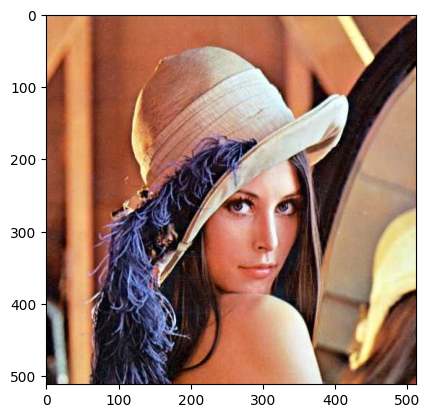

In [15]:
# Membaca gambar 'lena.jpg' dari Google Drive
img_1 = cv.imread('/content/drive/MyDrive/PCVK/lena1.jpeg')
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

<BarContainer object of 256 artists>

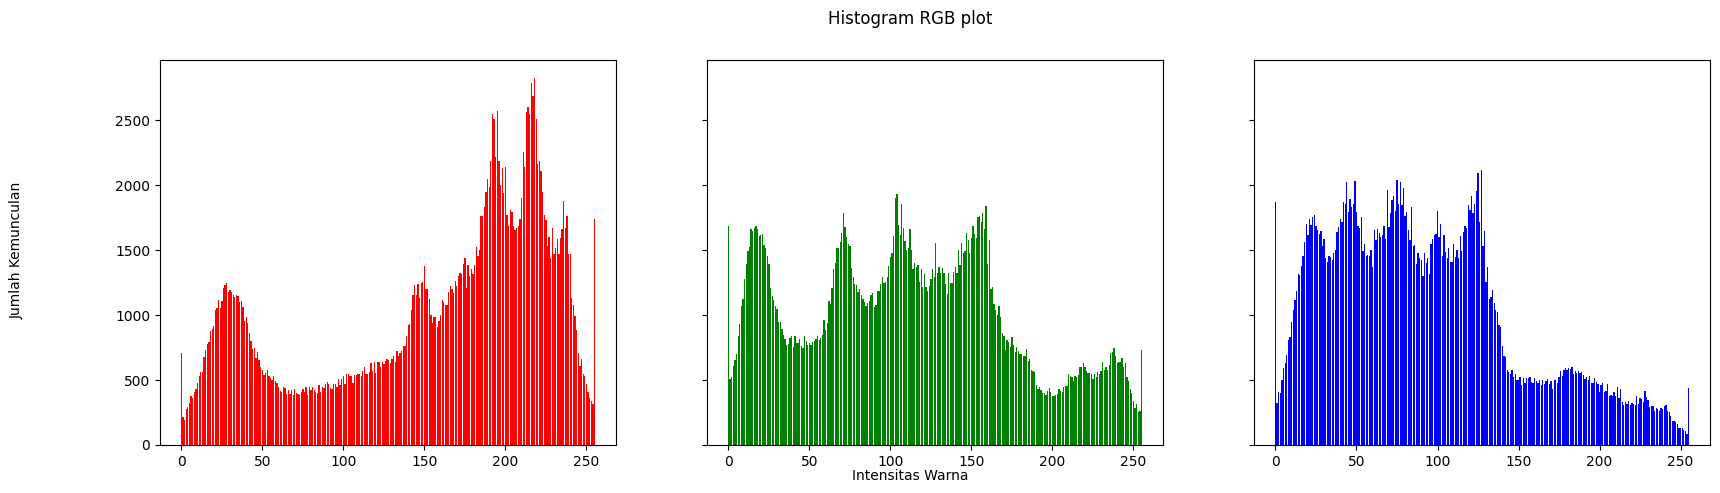

In [16]:
# Mendapatkan dimensi gambar (tinggi, lebar, kedalaman warna)
height, width, depth = np.shape(img_1)

# Membuat array 'names' yang berisi nilai dari 0 hingga 255
names = np.arange(256)

# Membuat array kosong untuk menghitung histogram warna biru, hijau, dan merah
blue = [0]*256
green = [0]*256
red = [0]*256

# Loop melalui setiap piksel gambar dan menghitung frekuensi warna
for y in range(0, height):
    for x in range(0, width):
        blue[img_1[y][x][0]] += 1
        green[img_1[y][x][1]] += 1
        red[img_1[y][x][2]] += 1

# Membuat array 'names' yang berisi nilai dari 0 hingga 255
names = np.arange(256)

# Membuat plot histogram untuk intensitas warna merah, hijau, dan biru
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

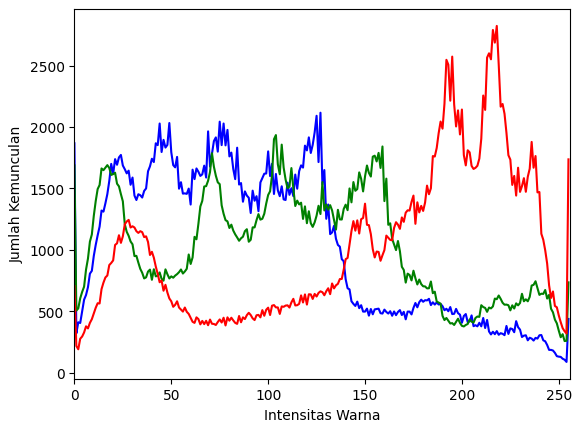

In [18]:

# Menentukan daftar warna dan ID saluran (channel) (0 = biru, 1 = hijau, 2 = merah)
colors = ("b", "g", "r")
channel_ids = (0, 1, 2)

# Membatasi sumbu x plot ke rentang 0 hingga 255
plt.xlim([0, 256])

# Loop melalui saluran (channel) warna (biru, hijau, merah)
for channel_id, c in zip(channel_ids, colors):
    # Menghitung histogram untuk saluran warna tertentu
    histogram, bin_edges = np.histogram(
        img_1[:, :, channel_id], bins=256, range=(0, 256)
    )

    # Plot histogram menggunakan warna yang sesuai
    plt.plot(bin_edges[0:-1], histogram, color=c)

# Menambahkan label sumbu x dan y ke plot
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

# Menampilkan plot histogram
plt.show()


Ya, dari hasil histogram tersebut output nya sama

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

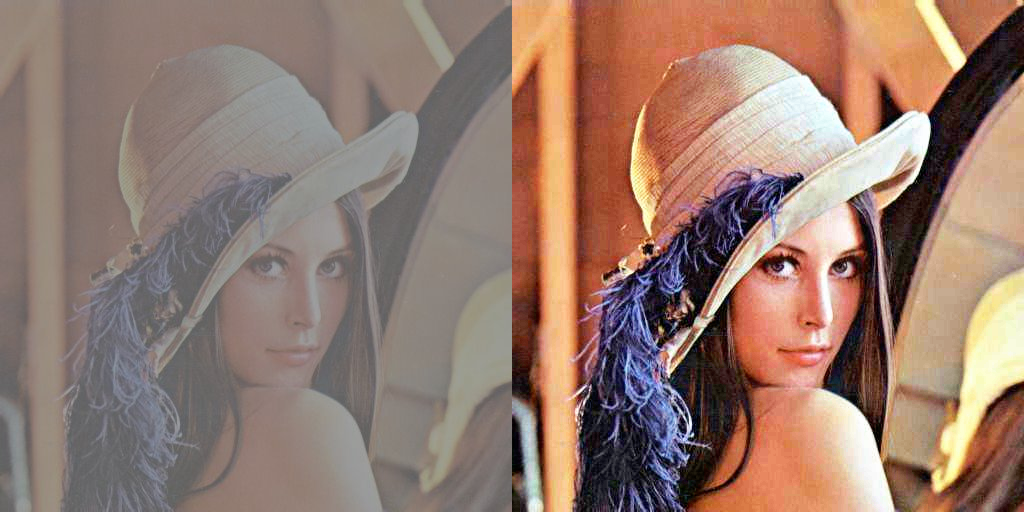

In [24]:
# Membaca gambar 'lena_lc.jpg' dari Google Drive
img1 = cv.imread('/content/drive/MyDrive/PCVK/lena.jpeg')

# Fungsi untuk menghitung histogram gambar
def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

# Menghitung histogram gambar asli
histo_asli = histog(img1)

# Mengonversi gambar menjadi array Numpy
img_array = np.asarray(img1)

# Langkah 1: Histogram kumulatif yang dinormalisasi
# Meratakan array gambar dan menghitung histogram dengan pembagian bin
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalisasi histogram
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Histogram kumulatif yang dinormalisasi
chistogram_array = np.cumsum(histogram_array)

# Langkah 2: Tabel pencarian pemetaan piksel
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Langkah 3: Transformasi
# Meratakan array gambar menjadi daftar
img_list = list(img_array.flatten())

# Mengubah nilai piksel sesuai dengan pemetaan
eq_img_list = [transform_map[p] for p in img_list]

# Mengembalikan bentuk asli dan menulis kembali ke img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Menghitung histogram gambar hasil ekualisasi
equal_histo = histog(img2)

# Menggabungkan gambar asli dan gambar hasil ekualisasi
final_frame = cv.hconcat((img1, img2))

# Menampilkan gambar
cv2_imshow(final_frame)

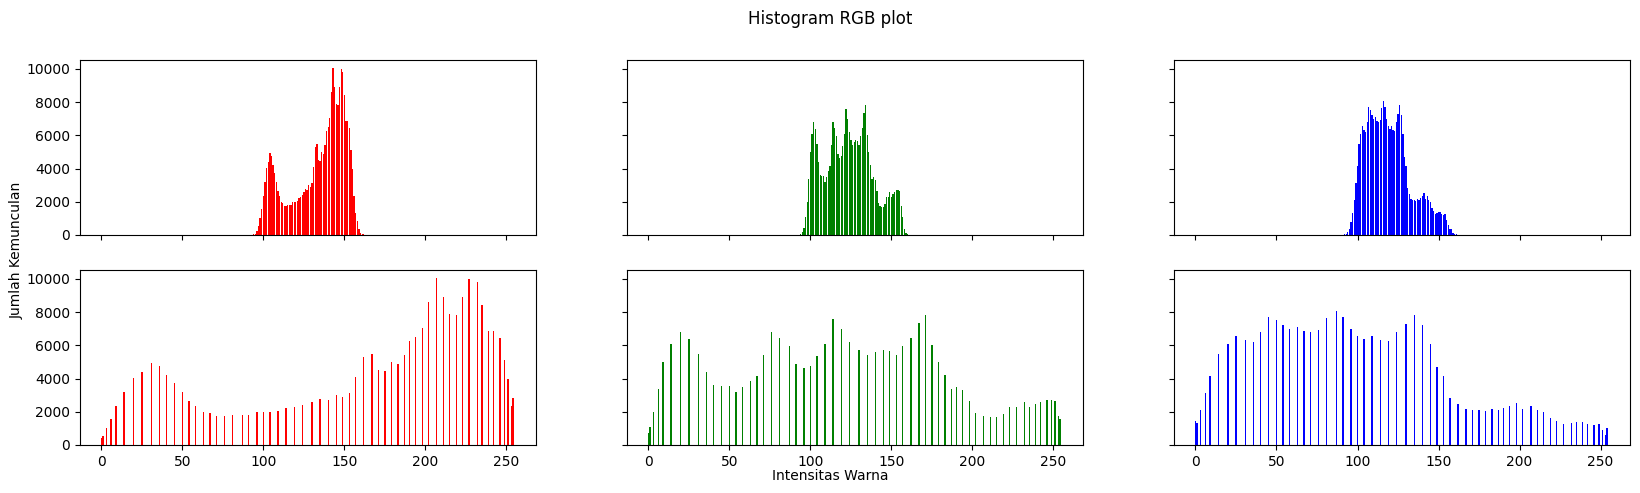

In [25]:
# Membuat array 'names' yang berisi nilai dari 0 hingga 255
names = np.arange(256)

# Memeriksa apakah gambar adalah gambar grayscale
isgrayimg = np.array_equal(histo_asli[0], histo_asli[1]) and np.array_equal(histo_asli[1], histo_asli[2])

# Menampilkan plot histogram sesuai dengan jenis gambar (grayscale atau warna)
if not isgrayimg:
    # Gambar berwarna
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    # Gambar grayscale
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')  # Mengganti judul grafik
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[0], color='gray')  # Menggunakan histo_asli[0] untuk gambar grayscale asli
    axs[1].bar(names, equal_histo[0], color='gray')  # Menggunakan equal_hist

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

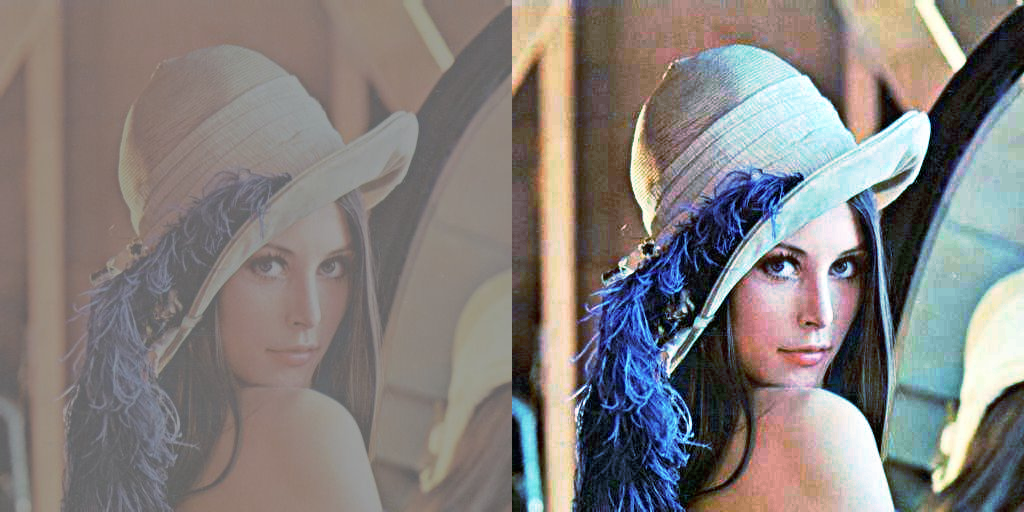

In [26]:
# Memisahkan saluran warna (channel) dari gambar 'img1' menjadi saluran merah, hijau, dan biru.
channels = cv.split(img1)

# Membuat daftar kosong 'eq_channels' untuk menyimpan saluran yang telah di-equalize.
eq_channels = []

# Loop melalui saluran dan warna yang sesuai (merah, hijau, biru).
for ch, color in zip(channels, ["r", "g", "b"]):
    # Melakukan equalization histogram pada saluran (channel) saat ini.
    eq_channels.append(cv.equalizeHist(ch))

# Menggabungkan kembali saluran yang telah di-equalize menjadi gambar equalized.
eq_image = cv.merge(eq_channels)

# Menghitung histogram dari gambar equalized.
equal_histo = histog(eq_image)

# Menggabungkan gambar asli dan gambar equalized secara horizontal.
final_frame = cv.hconcat((img1, eq_image))

# Menampilkan gambar asli dan gambar equalized secara bersampingan.
cv2_imshow(final_frame)

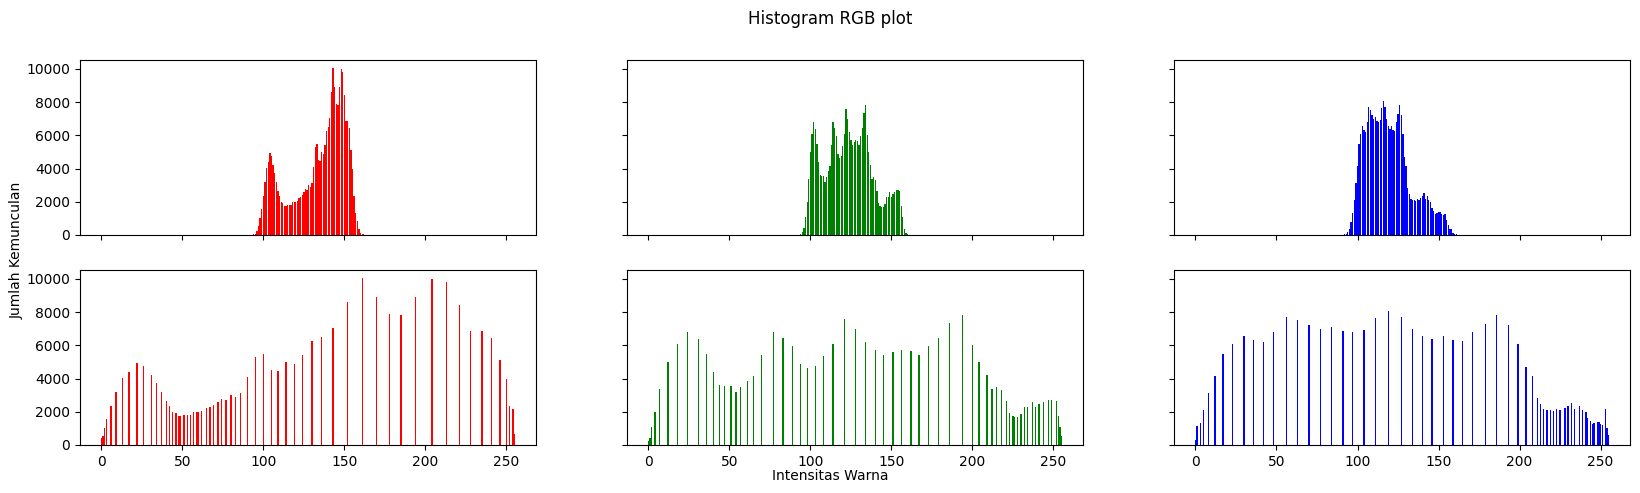

In [27]:
# Membuat larik 'names' yang berisi nilai dari 0 hingga 255.
names = np.arange(256)

# Memeriksa apakah gambar grayscale atau tidak dengan membandingkan saluran warna merah, hijau, dan biru.
isgraying = np.array_equal(channels[0], channels[1]) and np.array_equal(channels[1], channels[2])

# Jika gambar bukan grayscale:
if not isgraying:
    # Membuat plot histogram RGB dengan 2 baris dan 3 kolom.
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')  # Menambahkan judul keseluruhan plot.
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')  # Label sumbu Y.
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')  # Label sumbu X.

    # Menampilkan histogram untuk saluran merah, hijau, dan biru pada dua baris pertama.
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')

    # Menampilkan histogram kembali untuk saluran merah, hijau, dan biru pada dua baris kedua.
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    # Jika gambar adalah grayscale, maka hanya ada dua kolom dalam plot histogram.
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')  # Menambahkan judul keseluruhan plot.
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')  # Label sumbu Y.
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')  # Label sumbu X.

 # Menampilkan histogram untuk gambar grayscale pada kolom pertama.
    axs[0].bar(names, histo_asli[0], color='gray')

    # Menampilkan histogram untuk gambar grayscale yang telah di-equalize pada kolom kedua.
    axs[1].bar(names, equal_histo[0], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)


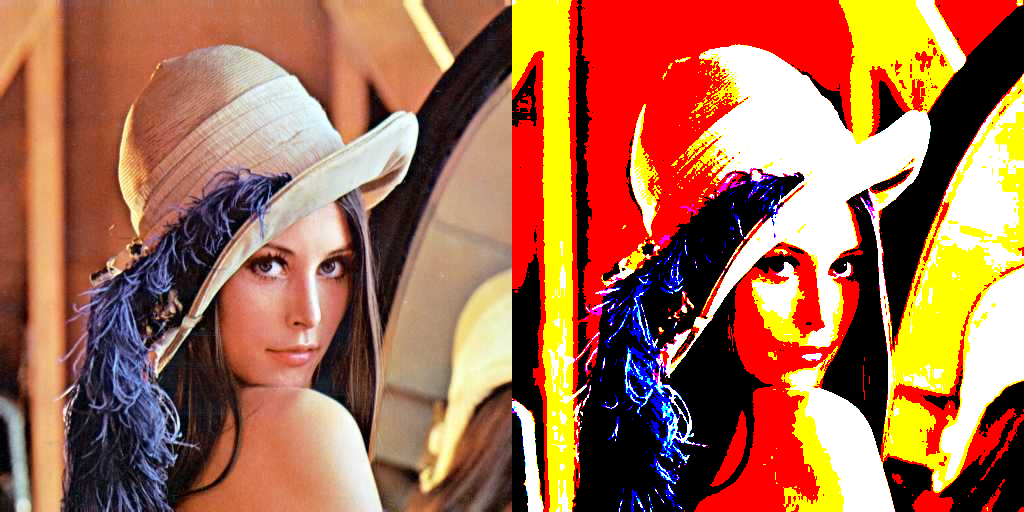

In [20]:
# Fungsi 'warnaTerdekat' digunakan untuk mencari warna terdekat dalam palet warna yang diberikan.
def warnaTerdekat(r, g, b):
    pValue = 0
    minDistance = 255*255 + 255*255 + 255*255 + 1  # Inisialisasi jarak minimum dengan nilai maksimum.
    warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]  # Palet warna yang tersedia.

    # Iterasi melalui semua warna dalam palet.
    for i in range(len(warnaPallette)):
        rDiff = r - warnaPallette[i][0]
        gDiff = g - warnaPallette[i][1]
        bDiff = b - warnaPallette[i][2]

        # Menghitung jarak Euclidean antara warna yang diberikan dan warna dalam palet.
        distance = rDiff * rDiff + gDiff * gDiff + bDiff * bDiff

        # Jika jarak yang dihitung lebih kecil dari jarak minimum yang saat ini ditemukan,
        # perbarui nilai jarak minimum dan indeks warna terdekat (pValue).
        if distance < minDistance:
            minDistance = distance
            pValue = i

    # Kembalikan indeks warna terdekat dalam palet.
    return pValue

# Palet warna yang tersedia.
warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

# Mengubah format warna gambar 'img_1' dari BGR ke RGB.
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

# Membuat gambar kosong dengan format yang sama seperti 'img_16'.
img_8 = np.zeros(img_16.shape, img_16.dtype)

# Iterasi melalui setiap piksel dalam gambar 'img_16'.
for y in range(0, img_16.shape[0]):
    for x in range(0, img_16.shape[1]):
        # Mencari warna terdekat dari palet untuk setiap piksel dan menggantinya dalam gambar 'img_8'.
        baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
        img_8[y, x] = warnaPallette[baru]

# Mengembalikan gambar 'img_16' ke format BGR dan 'img_8' ke format RGB.
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)

# Menggabungkan gambar 'img_16' dan 'img_8' secara horizontal.
final_frame = cv.hconcat((img_16, img_8))

# Menampilkan gambar final yang berisi gambar asli dan gambar dengan palet warna terdekat.
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

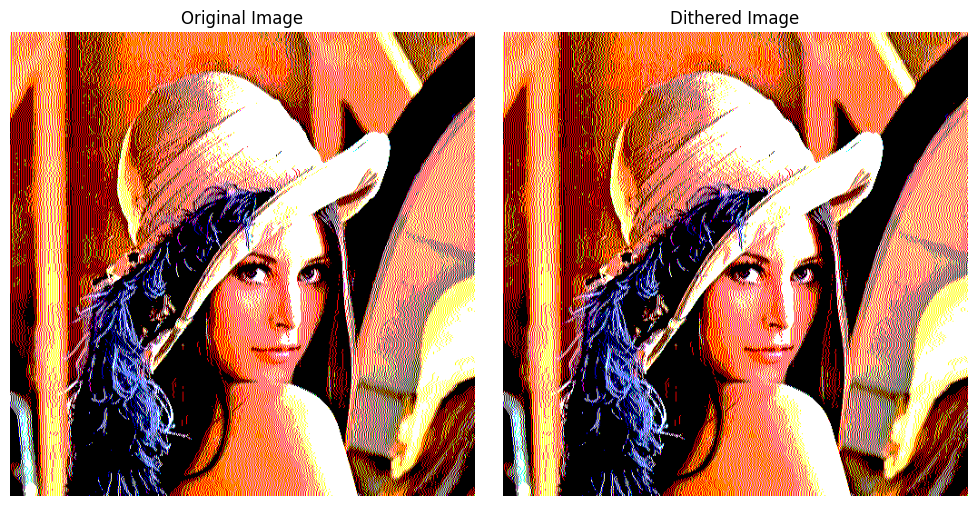

In [22]:
# Mengimpor modul yang diperlukan
from PIL import Image
import matplotlib.pyplot as plt

# Fungsi ini mengaplikasikan dithering pada gambar yang diberikan
def apply_dithering(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = quantize_pixel(old_pixel)  # Kuantisasi piksel
            image.putpixel((x, y), new_pixel)
            quant_error = calculate_quantization_error(old_pixel, new_pixel)
            distribute_error(image, x, y, quant_error)  # Mendistribusikan kesalahan kuantisasi
    return image

# Fungsi ini mengkuantisasi piksel ke warna terdekat yang memiliki nilai komponen RGB yang lebih rendah
def quantize_pixel(pixel):
    r, g, b = pixel
    new_r = round(r / 255) * 255
    new_g = round(g / 255) * 255
    new_b = round(b / 255) * 255
    return (new_r, new_g, new_b)

# Fungsi ini menghitung kesalahan kuantisasi antara piksel lama dan piksel baru
def calculate_quantization_error(old_pixel, new_pixel):
    r_old, g_old, b_old = old_pixel
    r_new, g_new, b_new = new_pixel
    quant_error_r = r_old - r_new
    quant_error_g = g_old - g_new
    quant_error_b = b_old - b_new
    return (quant_error_r, quant_error_g, quant_error_b)

# Fungsi ini mendistribusikan kesalahan kuantisasi ke piksel-piksel tetangga
def distribute_error(image, x, y, quant_error):
    width, height = image.size
    error_r, error_g, error_b = quant_error
    if x + 1 < width:
        new_pixel = image.getpixel((x + 1, y))
        image.putpixel((x + 1, y), (
            new_pixel[0] + (error_r * 7 // 16),
            new_pixel[1] + (error_g * 7 // 16),
            new_pixel[2] + (error_b * 7 // 16)
        ))
    # (lanjutan kode serupa untuk piksel-piksel tetangga)

# Mengunggah gambar input asli
input_image_path = "/content/drive/MyDrive/PCVK/lena1.jpeg"
input_image = Image.open(input_image_path)

# Memproses gambar dengan menerapkan dithering
output_image = apply_dithering(input_image)

# Membuat tampilan gambar menggunakan Matplotlib
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')
plt.axis('off')

# Menampilkan gambar hasil dithering
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Dithered Image')
plt.axis('off')

# Menampilkan gambar-gambar tersebut
plt.tight_layout()
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

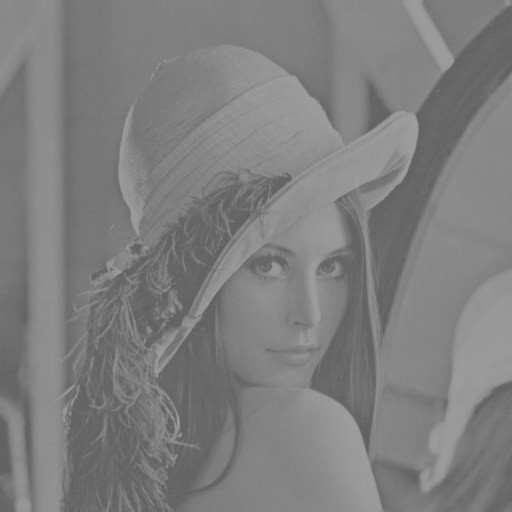

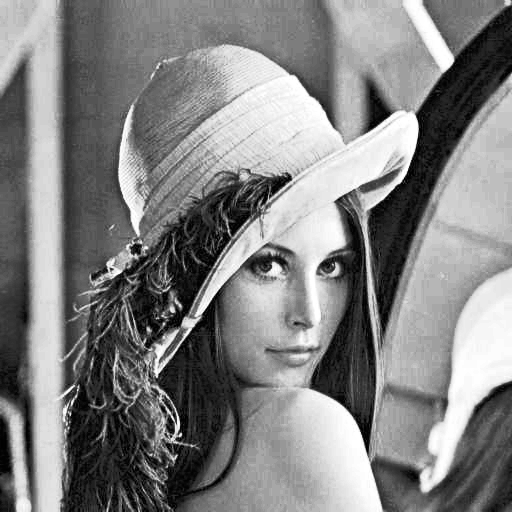

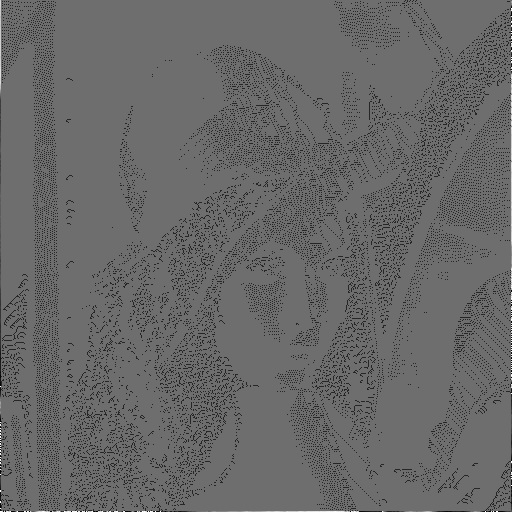

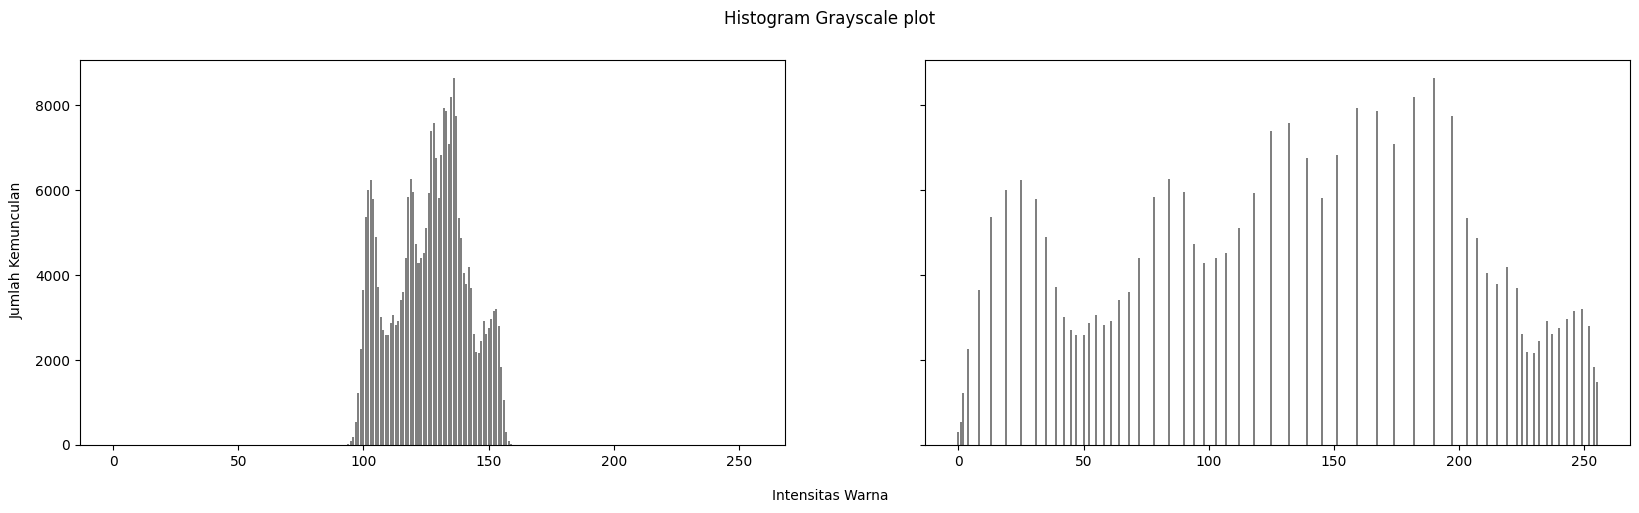

In [34]:
# Baca citra asli
image = cv.imread("/content/drive/MyDrive/PCVK/lena.jpeg", cv.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 240
for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 110
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 2 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)

plt.show()